In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def sigmoid_func(z):
    z = np.clip(z, -500, 500)  # Aşırı büyük değerleri engelle
    return 1 / (1 + np.exp(-z))

In [ ]:
def sigmoid_func_derivative(z):
    sig = sigmoid_func(z)
    return sig * (1 - sig)


In [ ]:
# eğitim seti
x = np.array([
    [1, 1], [1, 3], [1, 5], [1, 7], [1, 9],
    [3, 1], [3, 3], [3, 5], [3, 7], [3, 9],
    [5, 1], [5, 3], [5, 5], [5, 7], [5, 9],
    [7, 1], [7, 3], [7, 5], [7, 7], [7, 9],
    [9, 1], [9, 3], [9, 5], [9, 7], [9, 9]
])
y = [a * b for a, b in x]
# normalizasyon işlemi
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)


In [ ]:
# x1 in parametreleri
w11 = np.random.uniform(-0.5, 0.5)
w21 = np.random.uniform(-0.5, 0.5)
w31 = np.random.uniform(-0.5, 0.5)
w41 = np.random.uniform(-0.5, 0.5)
w51 = np.random.uniform(-0.5, 0.5)

# x2 nin parametreleri
w12 = np.random.uniform(-0.5, 0.5)
w22 = np.random.uniform(-0.5, 0.5)
w32 = np.random.uniform(-0.5, 0.5)
w42 = np.random.uniform(-0.5, 0.5)
w52 = np.random.uniform(-0.5, 0.5)

# hidden katmanının parametreleri
w01 = np.random.uniform(-0.5, 0.5)
w02 = np.random.uniform(-0.5, 0.5)
w03 = np.random.uniform(-0.5, 0.5)
w04 = np.random.uniform(-0.5, 0.5)
w05 = np.random.uniform(-0.5, 0.5)

# bias parametreleri
bias1= np.random.uniform(-0.5, 0.5)
bias2= np.random.uniform(-0.5, 0.5)
bias3= np.random.uniform(-0.5, 0.5)
bias4= np.random.uniform(-0.5, 0.5)
bias5= np.random.uniform(-0.5, 0.5)
bias_out= np.random.uniform(-0.5, 0.5)

learning_rate = 0.01
costs = []

In [ ]:
# Eğitim döngüsü
for epoch in range(10000):
    total_loss = 0
    for i in range(len(x)):  # Her örnek için
        # 1. İleri Geçiş
        z_h1 = bias1 + w11 * x[i][0] + w12 * x[i][1]
        hidden1 = sigmoid_func(z_h1)

        z_h2 = bias2 + w21 * x[i][0] + w22 * x[i][1]
        hidden2 = sigmoid_func(z_h2)

        z_h3 = bias3 + w31 * x[i][0] + w32 * x[i][0]
        hidden3 = sigmoid_func(z_h3)

        z_h4 = bias4 + w41 * x[i][0] + w42 * x[i][0]
        hidden4 = sigmoid_func(z_h4)

        z_h5 = bias5 + w51 * x[i][0] + w52 * x[i][0]
        hidden5 = sigmoid_func(z_h5)

        z_out = bias_out + w01*hidden1 + w02*hidden2 + w03*hidden3 + w04*hidden4 + w05*hidden5
        out = sigmoid_func(z_out)

        # 2. Hata Hesaplama
        mse = 0.5 * (out - y[i])**2
        total_loss += mse

        # 3. Hata ve Gradyan Hesaplama
        delta_out = (out - y[i]) * sigmoid_func_derivative(z_out)

        delta_h1 = delta_out * w01 * sigmoid_func_derivative(z_h1)
        delta_h2 = delta_out * w02 * sigmoid_func_derivative(z_h2)
        delta_h3 = delta_out * w03 * sigmoid_func_derivative(z_h3)
        delta_h4 = delta_out * w04 * sigmoid_func_derivative(z_h4)
        delta_h5 = delta_out * w05 * sigmoid_func_derivative(z_h5)


        # 4. Ağırlık Güncelleme
        # 2.katmandaki ağırlık güncellenmesi
        w01 -= learning_rate * delta_out * hidden1
        w02 -= learning_rate * delta_out * hidden2
        w03 -= learning_rate * delta_out * hidden3
        w04 -= learning_rate * delta_out * hidden4
        w05 -= learning_rate * delta_out * hidden5
        bias_out -= learning_rate * delta_out

        # 1.katmandaki ağırlık güncellenmesi
        # x[i][0]: x1, x[i][0]: x2
        w11 -= learning_rate * delta_h1 * x[i][0]
        w21 -= learning_rate * delta_h2 * x[i][0]
        w31 -= learning_rate * delta_h3 * x[i][0]
        w41 -= learning_rate * delta_h4 * x[i][0]
        w51 -= learning_rate * delta_h5 * x[i][0]

        w12 -= learning_rate * delta_h1 * x[i][1]
        w22 -= learning_rate * delta_h2 * x[i][1]
        w32 -= learning_rate * delta_h3 * x[i][1]
        w42 -= learning_rate * delta_h4 * x[i][1]
        w52 -= learning_rate * delta_h5 * x[i][1]
        bias1 -= learning_rate * delta_h1
        bias2 -= learning_rate * delta_h2
        bias3 -= learning_rate * delta_h3
        bias4 -= learning_rate * delta_h4
        bias5 -= learning_rate * delta_h5

    costs.append(total_loss / len(x))
    # Epoch sonunda toplam hatayı yazdır
    if (epoch + 1) % 100 == 0:
      print(f"Epoch {epoch + 1}, Total Loss: {total_loss:.4f}")



Epoch 100, Total Loss: 0.9089
Epoch 200, Total Loss: 0.8994
Epoch 300, Total Loss: 0.8906
Epoch 400, Total Loss: 0.8813
Epoch 500, Total Loss: 0.8713
Epoch 600, Total Loss: 0.8601
Epoch 700, Total Loss: 0.8474
Epoch 800, Total Loss: 0.8330
Epoch 900, Total Loss: 0.8164
Epoch 1000, Total Loss: 0.7976
Epoch 1100, Total Loss: 0.7765
Epoch 1200, Total Loss: 0.7530
Epoch 1300, Total Loss: 0.7272
Epoch 1400, Total Loss: 0.6995
Epoch 1500, Total Loss: 0.6702
Epoch 1600, Total Loss: 0.6397
Epoch 1700, Total Loss: 0.6084
Epoch 1800, Total Loss: 0.5768
Epoch 1900, Total Loss: 0.5453
Epoch 2000, Total Loss: 0.5143
Epoch 2100, Total Loss: 0.4839
Epoch 2200, Total Loss: 0.4544
Epoch 2300, Total Loss: 0.4259
Epoch 2400, Total Loss: 0.3985
Epoch 2500, Total Loss: 0.3722
Epoch 2600, Total Loss: 0.3471
Epoch 2700, Total Loss: 0.3232
Epoch 2800, Total Loss: 0.3004
Epoch 2900, Total Loss: 0.2788
Epoch 3000, Total Loss: 0.2584
Epoch 3100, Total Loss: 0.2393
Epoch 3200, Total Loss: 0.2214
Epoch 3300, Total

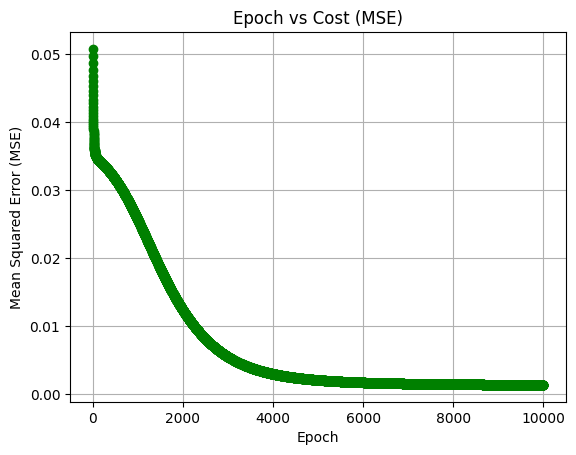

In [ ]:
# Maliyet grafiği çizdirme
plt.plot(range(1, len(costs) + 1), costs, marker='o', linestyle='-', color='g')
plt.title("Epoch vs Cost (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.show()

In [ ]:
num1 = float(input("Birinci sayıyı giriniz: "))
num2 = float(input("İkinci sayıyı giriniz: "))

#normalizasyon
norm_num1 = num1/9
norm_num2 = num2/9

#model tahmini
z_h1 = bias1 + w11 * norm_num1 + w12 * norm_num2
hidden1 = sigmoid_func(z_h1)

z_h2 = bias2 + w21 * norm_num1 + w22 * norm_num2
hidden2 = sigmoid_func(z_h2)

z_h3 = bias3 + w31 * norm_num1 + w32 * norm_num2
hidden3 = sigmoid_func(z_h3)

z_h4 = bias4 + w41 * norm_num1 + w42 * norm_num2
hidden4 = sigmoid_func(z_h4)

z_h5 = bias5 + w51 * norm_num1 + w52 * norm_num2
hidden5 = sigmoid_func(z_h5)

z_out = bias_out + w01*hidden1 + w02*hidden2 + w03*hidden3 + w04*hidden4 + w05*hidden5
out = sigmoid_func(z_out)

#denormalize işlemi
predicted_output = out * (y_max - y_min) + y_min

real_output = num1 * num2
print(f"Gerçek Çıktı: {real_output}")
print(f"Tahmin Edilen Çıktı: {predicted_output:.2f}")

Birinci sayıyı giriniz: 9
İkinci sayıyı giriniz: 8
Gerçek Çıktı: 72.0
Tahmin Edilen Çıktı: 63.92


In [ ]:
x_test = np.array([
    [2, 2], [2, 4], [2, 6], [2, 8], [2, 10],
    [4, 2], [4, 4], [4, 6], [4, 8], [4, 10],
    [6, 2], [6, 4], [6, 6], [6, 8], [6, 10],
    [8, 2], [8, 4], [8, 6], [8, 8], [8, 10],
    [10, 2], [10, 4], [10, 6], [10, 8], [10, 10]
])
y_test = np.array([a * b for a, b in x_test])

x_test_min = np.min(x)
x_test_max = np.max(x)
x_test = (x - x_min) / (x_max - x_min)

predicted_outputs = []

for i in range(len(x_test)):
  z_h1 = bias1 + w11 * x[i][0] + w12 * x[i][1]
  hidden1 = sigmoid_func(z_h1)

  z_h2 = bias2 + w21 * x[i][0] + w22 * x[i][1]
  hidden2 = sigmoid_func(z_h2)

  z_h3 = bias3 + w31 * x[i][0] + w32 * x[i][1]
  hidden3 = sigmoid_func(z_h3)

  z_h4 = bias4 + w41 * x[i][0] + w42 * x[i][1]
  hidden4 = sigmoid_func(z_h4)

  z_h5 = bias5 + w51 * x[i][0] + w52 * x[i][1]
  hidden5 = sigmoid_func(z_h5)

  z_out = bias_out + w01*hidden1 + w02*hidden2 + w03*hidden3 + w04*hidden4 + w05*hidden5
  out = sigmoid_func(z_out)

    # Normalizasyonu geri al
  predicted_output = out * (y_max - y_min) + y_min
  predicted_outputs.append(predicted_output)
predicted_outputs = np.array(predicted_outputs)

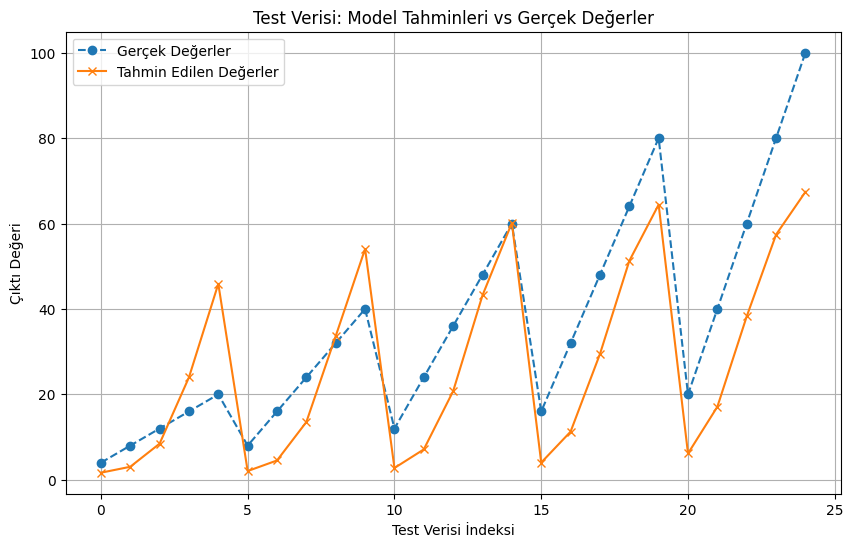

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Gerçek Değerler", marker='o', linestyle='--')
plt.plot(predicted_outputs, label="Tahmin Edilen Değerler", marker='x', linestyle='-')

# Grafik ayarları
plt.title("Test Verisi: Model Tahminleri vs Gerçek Değerler")
plt.xlabel("Test Verisi İndeksi")
plt.ylabel("Çıktı Değeri")
plt.legend()
plt.grid(True)
plt.show()